# Performance analysis: physiological signal processing



In [8]:
import pandas as pd

# Given test results - choose my own values
TP = 20  # True Positive
FP = 180 # False Positive
FN = 10  # False Negative
TN = 1820 # True Negative

# Compute metrics
sensitivity = TP / (TP + FN) * 100  # Sensitivity (Recall) = TP / (TP + FN)
specificity = TN / (TN + FP) * 100  # Specificity = TN / (TN + FP)
ppv = TP / (TP + FP) * 100  # Positive Predictive Value (PPV) = TP / (TP + FP)
npv = TN / (TN + FN) * 100  # Negative Predictive Value (NPV) = TN / (TN + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100  # Accuracy = (TP + TN) / Total
precision = ppv  # Precision is the same as PPV
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)  # F1 Score formula

# Create a DataFrame for display
results = pd.DataFrame({
    "Metric": ["Sensitivity (Recall)", "Specificity", "Positive Predictive Value (PPV)", "Negative Predictive Value (NPV)", "Accuracy", "Precision", "F1 Score"],
    "Value (%)": [sensitivity, specificity, ppv, npv, accuracy, precision, f1_score]
})

# Display results
results


,Metric,Value (%)
0,Sensitivity (Recall),66.666667
1,Specificity,91.000000
2,Positive Predictive Value (PPV),10.000000
3,Negative Predictive Value (NPV),99.453552
4,Accuracy,90.640394
5,Precision,10.000000
6,F1 Score,17.391304


## Interpretations


--- Performance Classification ---

🟡 Sensitivity (Recall): Average (50-74%) - The system is working but has significant weaknesses.
✅ Specificity: Excellent (≥90%) - The system performs very well in this area.
🔴 Positive Predictive Value (Precision): Poor (<50%) - The system needs major improvements in this area.
✅ Negative Predictive Value: Excellent (≥90%) - The system performs very well in this area.
✅ Accuracy: Excellent (≥90%) - The system performs very well in this area.
🔴 F1 Score: Poor (<50%) - The system needs major improvements in this area.


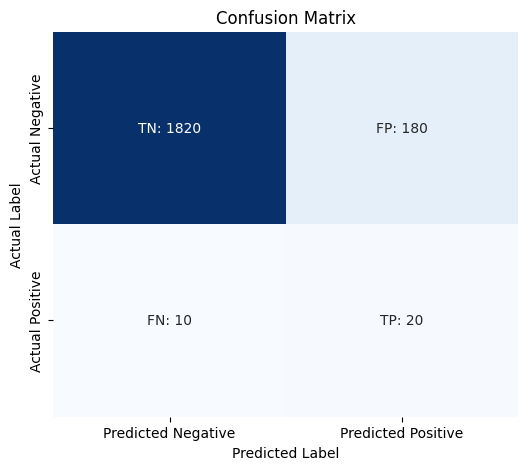

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Given test results
TP = 20  # True Positive
FP = 180 # False Positive
FN = 10  # False Negative
TN = 1820 # True Negative

# Compute metrics
sensitivity = TP / (TP + FN) * 100  # Sensitivity (Recall)
specificity = TN / (TN + FP) * 100  # Specificity
ppv = TP / (TP + FP) * 100  # Positive Predictive Value (Precision)
npv = TN / (TN + FN) * 100  # Negative Predictive Value
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100  # Accuracy
f1_score = (2 * ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) != 0 else 0

# Classification system for metrics
def classify_metric(value, metric_name):
    """Classifies the given metric based on performance levels."""
    if value >= 90:
        return f"✅ {metric_name}: Excellent (≥90%) - The system performs very well in this area."
    elif value >= 75:
        return f"🟢 {metric_name}: Good (75-89%) - Performance is solid, but there's some room for improvement."
    elif value >= 50:
        return f"🟡 {metric_name}: Average (50-74%) - The system is working but has significant weaknesses."
    else:
        return f"🔴 {metric_name}: Poor (<50%) - The system needs major improvements in this area."

# Display results with classification
print("\n--- Performance Classification ---\n")
print(classify_metric(sensitivity, "Sensitivity (Recall)"))
print(classify_metric(specificity, "Specificity"))
print(classify_metric(ppv, "Positive Predictive Value (Precision)"))
print(classify_metric(npv, "Negative Predictive Value"))
print(classify_metric(accuracy, "Accuracy"))
print(classify_metric(f1_score, "F1 Score"))

# Confusion Matrix Display
def plot_confusion_matrix(TP, FP, FN, TN, title="Confusion Matrix"):
    """Plots a confusion matrix as a heatmap."""
    conf_matrix = np.array([[TN, FP], [FN, TP]])

    labels = np.array([["TN: " + str(TN), "FP: " + str(FP)],
                        ["FN: " + str(FN), "TP: " + str(TP)]])

    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False, 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

plot_confusion_matrix(TP, FP, FN, TN)


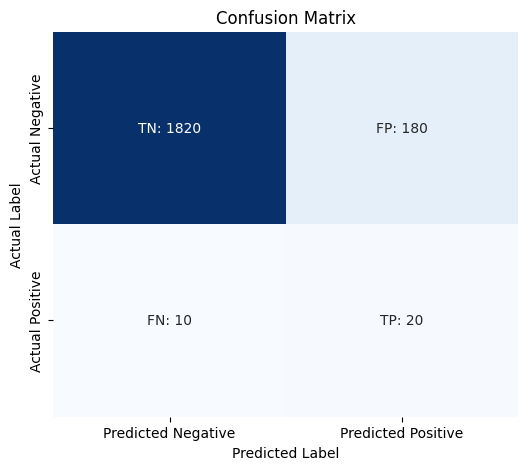

/tmp/ipykernel_395276/1738940495.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results["Metric"], y=results["Value (%)"], palette="viridis")


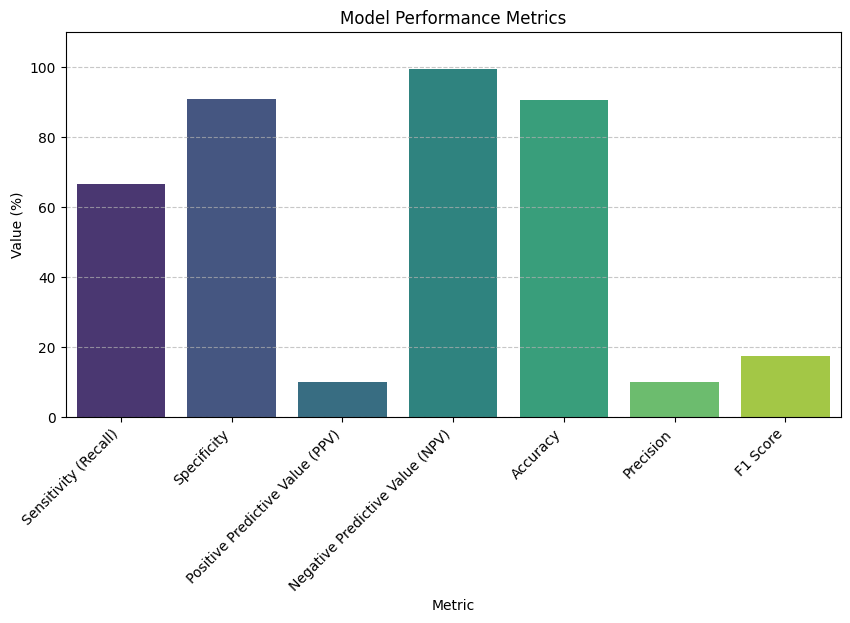

In [12]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(TP, FP, FN, TN, title="Confusion Matrix"):
    """
    Plots a confusion matrix as a heatmap.
    
    Parameters:
    TP (int): True Positives
    FP (int): False Positives
    FN (int): False Negatives
    TN (int): True Negatives
    title (str): Title of the plot
    """
    # Define confusion matrix as a NumPy array
    conf_matrix = np.array([[TN, FP], [FN, TP]])

    # Labels for the matrix
    labels = np.array([["TN: " + str(TN), "FP: " + str(FP)],
                        ["FN: " + str(FN), "TP: " + str(TP)]])

    # Create the heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False, 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

# Example Usage:
plot_confusion_matrix(TP=20, FP=180, FN=10, TN=1820)



# Visualization of Performance Metrics
plt.figure(figsize=(10, 5))
sns.barplot(x=results["Metric"], y=results["Value (%)"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Value (%)")
plt.title("Model Performance Metrics")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()